In [1]:
import numpy as np
from scipy.io import wavfile
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
fnames = os.listdir('../dataset/')

In [7]:
clean_dataset = []
dist_dataset = []
for fname in tqdm(fnames):
    fs, tmp = wavfile.read('../dataset/'+fname)
    tmp = tmp / max(abs(tmp))
    dist_factor = (np.random.rand(1)*2) + 2.
    """"""
    #print(dist_factor)
    """"""
    magnitude_factor = (np.random.rand(1)*0.6) + 0.4
    clean_dataset.append(magnitude_factor*tmp)
    dist_dataset.append(magnitude_factor*np.clip(dist_factor*tmp, -1, 1))

clean_dataset = np.array(clean_dataset)
dist_dataset = np.array(dist_dataset)

100%|███████████████████████████████████████████████████████████████████████████████| 220/220 [00:01<00:00, 183.35it/s]


In [8]:
np.savez_compressed('train_data.npz', 
                    clean_data=clean_dataset, 
                    dist_data=dist_dataset)

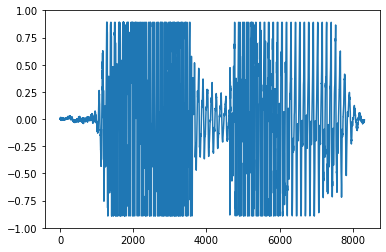

In [11]:
plt.plot(dist_dataset[1])
plt.ylim([-1, 1])
plt.show()
dataset_sample = (dist_dataset[1]*(2**15) // 1).astype(np.int16)
wavfile.write('../histograms/tmp_files/dataset_sample2.wav', fs, dataset_sample)